In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

# Load dataset
df = pd.read_csv("station_month.csv")
print(df.head())
print(df.info())

  Station  Year  Month   Day  Night  DayLimit  NightLimit
0   BEN01  2011      2  66.0   56.0        55          45
1   BEN01  2011      3  66.0   58.0        55          45
2   BEN01  2011      4  66.0   57.0        55          45
3   BEN01  2011      5  66.0   56.0        55          45
4   BEN01  2011      6  67.0   57.0        55          45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station     5005 non-null   object 
 1   Year        5005 non-null   int64  
 2   Month       5005 non-null   int64  
 3   Day         5002 non-null   float64
 4   Night       4995 non-null   float64
 5   DayLimit    5005 non-null   int64  
 6   NightLimit  5005 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 273.8+ KB
None


In [ ]:

# 3. Handle Missing Values
df['Day'] = df['Day'].fillna(df['Day'].median())
df['Night'] = df['Night'].fillna(df['Night'].median())

In [ ]:

# 4. Create Target Column (Quality Label)
# Good (1) if Day ≤ DayLimit and Night ≤ NightLimit, else Bad (0)
df['quality_label'] = df.apply(
    lambda row: 1 if (row['Day'] <= row['DayLimit']) and (row['Night'] <= row['NightLimit']) else 0,
    axis=1
)

print(df[['Day', 'Night', 'DayLimit', 'NightLimit', 'quality_label']].head())

    Day  Night  DayLimit  NightLimit  quality_label
0  66.0   56.0        55          45              0
1  66.0   58.0        55          45              0
2  66.0   57.0        55          45              0
3  66.0   56.0        55          45              0
4  67.0   57.0        55          45              0


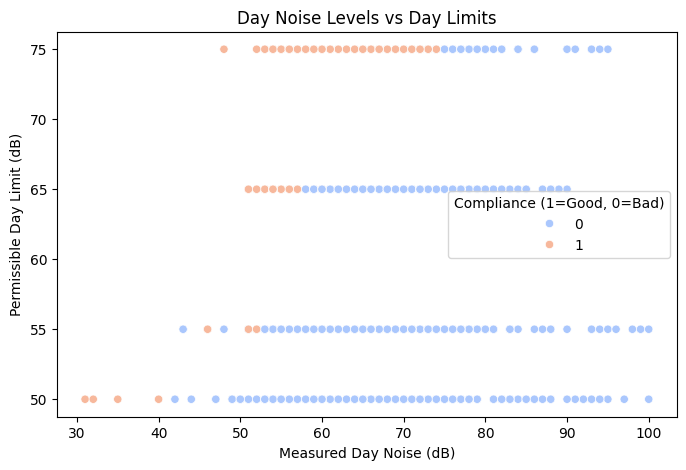

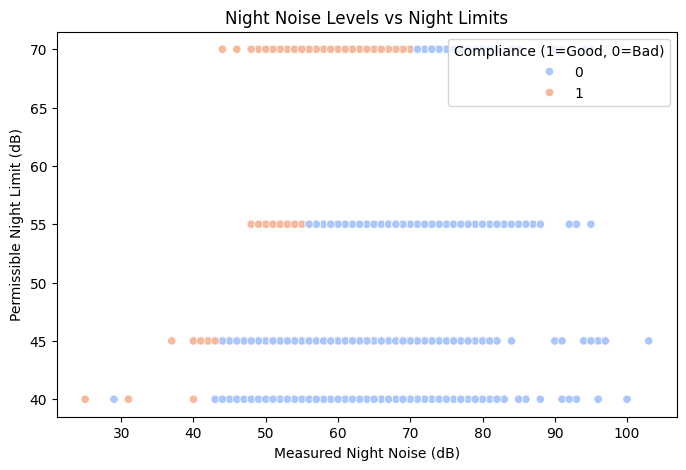

In [26]:

# Scatter plot: Day vs DayLimit
plt.figure(figsize=(8,5))
sns.scatterplot(x="Day", y="DayLimit", hue="quality_label", data=df, palette="coolwarm")
plt.title("Day Noise Levels vs Day Limits")
plt.xlabel("Measured Day Noise (dB)")
plt.ylabel("Permissible Day Limit (dB)")
plt.legend(title="Compliance (1=Good, 0=Bad)")
plt.show()

# Scatter plot: Night vs NightLimit
plt.figure(figsize=(8,5))
sns.scatterplot(x="Night", y="NightLimit", hue="quality_label", data=df, palette="coolwarm")
plt.title("Night Noise Levels vs Night Limits")
plt.xlabel("Measured Night Noise (dB)")
plt.ylabel("Permissible Night Limit (dB)")
plt.legend(title="Compliance (1=Good, 0=Bad)")
plt.show()

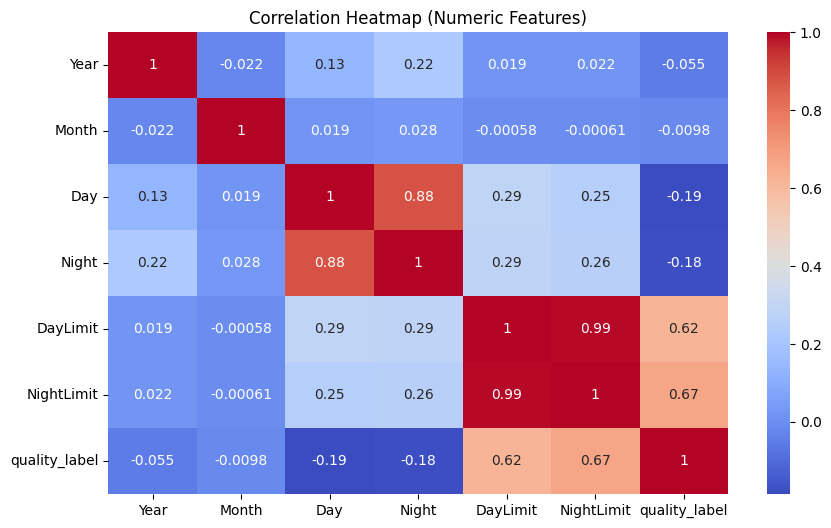

In [ ]:

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:

# 6. Prepare Features & Target
X = df[['Day', 'Night', 'DayLimit', 'NightLimit']]
y = df['quality_label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.98998998998999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       824
           1       0.96      0.98      0.97       175

    accuracy                           0.99       999
   macro avg       0.98      0.99      0.98       999
weighted avg       0.99      0.99      0.99       999



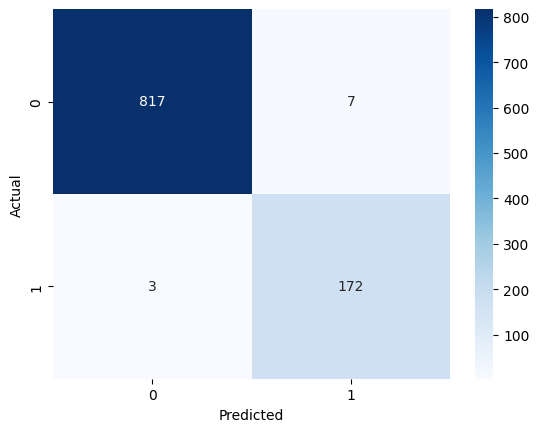

In [ ]:

# 7. Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# Save the Noise Pollution Compliance Model
import joblib
joblib.dump(model, "noise_pollution_model.pkl")
print("✅ Model saved as noise_pollution_model.pkl")

✅ Model saved as noise_pollution_model.pkl
